# **Random Forest**

Random Forest is a kind of ensemble learning. Ensemble learning is to aggregate the predictions of multiple models into one final prediction, whcih not only can get a higher prediction preformance, can also reduce overfitting. Here are 3 basic ensemble methods: Bagging, Boosting and Stacking, and Random Forest is make use of Bagging concept.

#### **Bagging**

The concept of Bagging is to separate the data into several subsets, and train a decision tree model on each subset parallelly, then agreegate the prediction value by majority rule for classification problems and take average for regression problems.

<img src="img/bagging.png" width="600">

If combine the concept of Bagging and Decision Tree, the model is called Random Forest.

In [3]:
from scripts.models import DecisionTreeClassifier
import random
import numpy as np
from statistics import mode

class RandomForestClassifier:
    def __init__(self, n_classifiers: int = 3, data_percentage = 0.5, criterion: str = 'entropy', max_depth: int = 6, min_samples_leaf: int = 1):
        self.n_classifiers = n_classifiers
        self.data_percentage = data_percentage
        self.classifiers = [DecisionTreeClassifier(criterion, max_depth, min_samples_leaf) for _ in range(n_classifiers)]
    
    def fit(self, X: np.array, Y: np.array):
        """Build multiple decision trees for the given data
        Args:
            X (np.array): The input data
            Y (np.array): The target labels"""
        data_len = len(X)
        idx = random.choices(list(range(data_len)),k=int(data_len*self.data_percentage))

        for i in range(self.n_classifiers):
            sub_X = X[idx]
            sub_Y = Y[idx]
            self.classifiers[i].fit(sub_X, sub_Y)

    def predict(self, X: np.array) -> np.array:
        """Predict the labels for the given data
        Args:
            X (np.array): The input data
        Returns:
            np.array: The predicted labels"""
        predictions = []
        for x in X:
            p = []
            for c in self.classifiers:
                node = c.tree
                while node.left is not None and node.right is not None:
                    if x[node.feature_idx] < node.feature_val:
                        node = node.left
                    else:
                        node = node.right
                p.append(np.argmax(node.label_probs))
            predictions.append(mode(p))
        return np.array(predictions)

Accuracy: 93 %


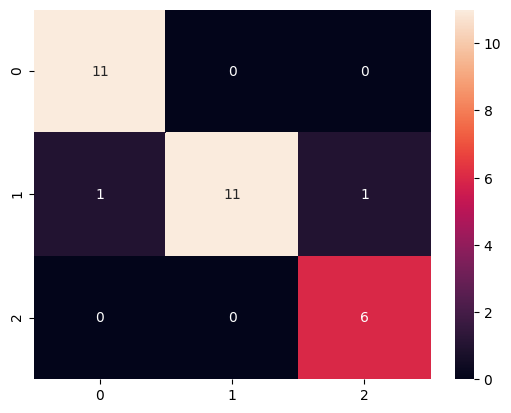

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# load iris dataset
iris = datasets.load_iris()
X= np.array(iris.data)
y = np.array(iris.target)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Build up the decision tree classifier
dt = RandomForestClassifier(max_depth = 3)
dt.fit(X_train, y_train)

# Predict on testing data
y_pred = dt.predict(X_test)

# Print out the result
#dt.print_tree(dt.tree)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 10})


acc = np.sum(y_test==y_pred)/len(y_pred)
print("Accuracy: {} %".format(round(acc*100),2))